In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import cv2
import math

In [2]:
global img1
global img1_copy
img1 = cv2.imread("spiral.jpg")
img1_copy = img1.copy()
global h, w, c
h, w, c = img1_copy.shape

smoothing spiral image by GaussianBlur function

Text(0.5, 1.0, 'smooth spiral')

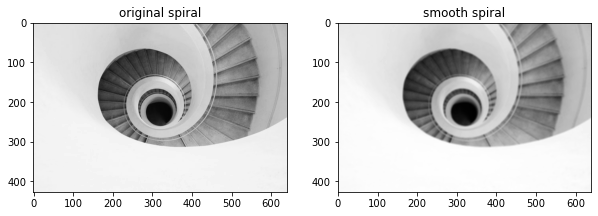

In [3]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

smooth_spiral = cv2.GaussianBlur(img1_copy, (5,5), cv2.BORDER_DEFAULT)
gray1 = cv2.cvtColor(img1_copy,cv2.COLOR_BGR2GRAY) #show the color image
gray2 = cv2.cvtColor(smooth_spiral,cv2.COLOR_BGR2GRAY)


fig.add_subplot(rows, columns, 1) 
plt.imshow(gray1, cmap = 'gray')
plt.title("original spiral")

fig.add_subplot(rows, columns, 2)
plt.imshow(gray2, cmap = 'gray')
plt.title("smooth spiral")


define sobel's edge masks

In [4]:
#define vertical mask
vertical_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#define horizontal mask
horizontal_mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(vertical_mask)
print(horizontal_mask)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


convolve both masks over input image using filter2D

Text(0.5, 1.0, 'horizontal_mask spiral')

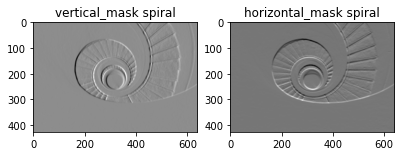

In [5]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3
Gy = cv2.filter2D(gray2, cv2.CV_16S, vertical_mask)
Gx = cv2.filter2D(gray2, cv2.CV_16S, horizontal_mask)

fig.add_subplot(rows, columns, 1) 
plt.imshow(Gy, cmap = 'gray')
plt.title("vertical_mask spiral")

fig.add_subplot(rows, columns, 2)
plt.imshow(Gx, cmap = 'gray')
plt.title("horizontal_mask spiral")

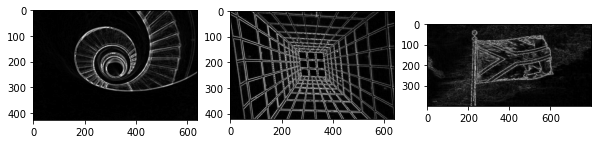

In [6]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3

img2 =  np.zeros([h,w,c], dtype=np.uint8)
for i in range(h):
    for j in range(w):
        img2[i][j] = abs(Gy[i][j]) + abs(Gx[i][j])
        
    
line = cv2.imread("lines.jpg")
gray4 = cv2.cvtColor(line,cv2.COLOR_BGR2GRAY)        
Gy1 = cv2.filter2D(gray4, cv2.CV_16S, vertical_mask)
Gx1 = cv2.filter2D(gray4, cv2.CV_16S, horizontal_mask)    
h2, w2, c2 = line.shape
img3 = np.zeros([h2,w2,c2], dtype=np.uint8)
for i in range(h2):
    for j in range(w2):
        img3[i][j] = abs(Gy1[i][j]) + abs(Gx1[i][j])
        
SAFlag = cv2.imread("SAFlag.jpg")
gray5 = cv2.cvtColor(SAFlag,cv2.COLOR_BGR2GRAY) #show the color image       
Gy2 = cv2.filter2D(gray5, cv2.CV_16S, vertical_mask)
Gx2 = cv2.filter2D(gray5, cv2.CV_16S, horizontal_mask)
h3, w3, c3 = SAFlag.shape
img4 = np.zeros([h3,w3,c3], dtype=np.uint8)
for i in range(h3):
    for j in range(w3):
        img4[i][j] = abs(Gy2[i][j]) + abs(Gx2[i][j])
                
fig.add_subplot(rows, columns, 1) 
plt.imshow(img2, cmap = 'gray')

fig.add_subplot(rows, columns, 2) 
plt.imshow(img3, cmap = 'gray')

fig.add_subplot(rows, columns, 3) 
plt.imshow(img4, cmap = 'gray')


In [7]:
def trackbar(x):
    global high
    global low
    global k_val
    k_val = cv2.getTrackbarPos("threshold","image")
    low = cv2.getTrackbarPos("low","image")
    high = cv2.getTrackbarPos("high","image")

In [8]:
def Getthreshold(img):
    img_out = np.zeros([h,w,c], dtype=np.uint8)
    threshold = cv2.getTrackbarPos("threshold","image")
    for i in range(h):
        for j in range(w):
            for m in range(3):
                if (img[i, j, m] >= threshold):
                    img_out[i, j] = np.uint8(255)
    return img_out

In [9]:
def Canny_boundary(img):
    l = cv2.getTrackbarPos("low","image")
    h = cv2.getTrackbarPos("high","image")
    img_output = cv2.Canny(img, l, h)
    return img_output

In [10]:
def edge_detection(img, vertical_mask, horizontal_mask):
    img2 =  np.zeros([h,w,c], dtype=np.uint8)
    Gy = cv2.filter2D(img, cv2.CV_16S, vertical_mask)
    Gx = cv2.filter2D(img, cv2.CV_16S, horizontal_mask)
    for i in range(h):
        for j in range(w):
            img2[i][j] = abs(Gy[i][j]) + abs(Gx[i][j])
            
    return img2

In [11]:
cv2.namedWindow('image')
cv2.createTrackbar("threshold", "image", 0, 50, trackbar)
vertical_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
horizontal_mask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

cv2.imshow('image',img1_copy)
while True:
    key = cv2.waitKey(1) 
    if key == 27:
        break
    if key == 13: 
        print("press enter to process, press esc to exit")
        smoothed_spiral = cv2.GaussianBlur(img1_copy, (5,5), cv2.BORDER_DEFAULT)
        gray = cv2.cvtColor(smoothed_spiral,cv2.COLOR_BGR2GRAY)
        img_new = edge_detection(gray, vertical_mask, horizontal_mask)
        img_new = Getthreshold(img_new)
        cv2.imshow('image',img_new)
cv2.destroyAllWindows() 

press enter to process, press esc to exit


In [12]:
img = cv2.imread("spiral.jpg")
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.namedWindow('image')
cv2.createTrackbar("low", "image", 0, 100, trackbar)
cv2.createTrackbar("high", "image", 0, 100, trackbar)
cv2.imshow('image',img)
while True:
    key = cv2.waitKey(1) 
    if key == 27:
        break
    if key ==13:
        img1_canny = Canny_boundary(img)
        cv2.imshow('image_canny', img1_canny)
canny_copy = img1_canny.copy()
cv2.destroyAllWindows() 

In [13]:
def Changethreshold(img, t_val):
    img_out = np.zeros([h,w], dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            for m in range(3):
                if (img[i, j, m] >= t_val):
                    img_out[i,j] = np.uint8(255)
    return img_out

In [23]:
img1_test = cv2.imread("spiral.jpg")
img1_test_copy = img1_test.copy()
smooth_test = cv2.GaussianBlur(img1_test, (5,5), cv2.BORDER_DEFAULT)
gray1_test = cv2.cvtColor(smooth_test, cv2.COLOR_BGR2GRAY)
img1_new = edge_detection(gray1_test, vertical_mask, horizontal_mask)
img2_new = img1_new
ratio_1 = []
for t_val in range(1,100):
    count = 0
    ratio = 0
    img1_new = Changethreshold(img2_new, t_val)
    for i in range(h):
            for j in range(w):
                if img1_new[i,j] == canny_copy[i,j]:
                    count = count + 1
    ratio = count / (h*w)
    print(ratio)
    ratio_1.append(ratio)
print(ratio_1)

0.45271150468384075
0.45271150468384075
0.5236350995316159
0.5236350995316159
0.6522797131147541
0.6522797131147541
0.7393003512880562
0.7393003512880562
0.7653139637002342
0.7653139637002342
0.7776602751756441
0.7776602751756441
0.7875109777517565
0.7875109777517565
0.7951514929742389
0.7951514929742389
0.8024151053864169
0.8024151053864169
0.808086943793911
0.808086943793911
0.8134367681498829
0.8134367681498829
0.8176595433255269
0.8176595433255269
0.8221348067915691
0.8221348067915691
0.8260209309133489
0.8260209309133489
0.8298375292740047
0.8298375292740047
0.8331271955503513
0.8331271955503513
0.8361350995316159
0.8361350995316159
0.8385794789227167
0.8385794789227167
0.8411043618266979
0.8411043618266979
0.8431974531615926
0.8431974531615926
0.8453600702576113
0.8453600702576113
0.8471860362997659
0.8471860362997659
0.8489607728337236
0.8489607728337236
0.8505964578454333
0.8505964578454333
0.8520930913348946
0.8520930913348946
0.8535531323185012
0.8535531323185012
0.8547680035

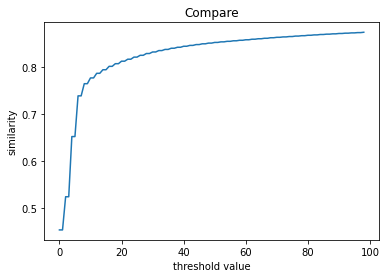

In [26]:
plt.plot(ratio_1)
plt.title("Compare")
plt.xlabel("threshold value")
plt.ylabel("similarity")
plt.show()